<a href="https://colab.research.google.com/github/SushilKokare/DeepLearningStudy/blob/main/1_Binary_Classification_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb

### Loding Data

In [ ]:
(train_data, train_label), (test_data,test_label) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
def showshape():
  print('train_data ',train_data.shape)
  print('train_label ',train_label.shape)
  print('test_data ',test_data.shape)
  print('test_label ',test_label.shape)

In [ ]:
showshape()

train_data  (25000,)
train_label  (25000,)
test_data  (25000,)
test_label  (25000,)


In [ ]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
train_label[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
len(word_index)

88584

In [ ]:
type(word_index)

dict

In [ ]:
cnt = 0
for k,v in word_index.items():
  if cnt==10:
    break
  print(k,v)
  cnt += 1

fawn 34701
tsukino 52006
nunnery 52007
sonja 16816
vani 63951
woods 1408
spiders 16115
hanging 2345
woody 2289
trawling 52008


In [ ]:
reverse_word_index = dict( [(value,key) for (key,value) in  word_index.items()])

In [ ]:
cnt = 0
for k,v in reverse_word_index.items():
  if cnt==10:
    break
  print(k,v)
  cnt += 1

34701 fawn
52006 tsukino
52007 nunnery
16816 sonja
63951 vani
1408 woods
16115 spiders
2345 hanging
2289 woody
52008 trawling


In [ ]:
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

Encoding the integer sequences into a binary matrix

In [ ]:
import numpy as np

In [ ]:
def vectorize_sequences(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
x_train[0].shape

(10000,)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.array(train_label).astype('float32')
y_test = np.array(test_label).astype('float32')

In [ ]:
y_train.shape

(25000,)

In [ ]:
y_train[0].shape

()

In [ ]:
y_train[0]

1.0

### Building the network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu',input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
x_val.shape

(10000, 10000)

In [ ]:
partial_x_train.shape

(15000, 10000)

In [ ]:
history = model.fit(partial_x_train,partial_y_train,
                    epochs=20,batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 92ms/step - loss: 0.5266 - accuracy: 0.7733 - val_loss: 0.3939 - val_accuracy: 0.8660
Epoch 2/20
30/30 [==============================] - 2s 54ms/step - loss: 0.3256 - accuracy: 0.8925 - val_loss: 0.3128 - val_accuracy: 0.8862
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2439 - accuracy: 0.9185 - val_loss: 0.2867 - val_accuracy: 0.8869
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1994 - accuracy: 0.9337 - val_loss: 0.2864 - val_accuracy: 0.8857
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1652 - accuracy: 0.9463 - val_loss: 0.2820 - val_accuracy: 0.8851
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1442 - accuracy: 0.9538 - val_loss: 0.2847 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1213 - accuracy: 0.9631 - val_loss: 0.2964 - val_accuracy: 0.8857
Epoch 8/20
30

In [ ]:
history

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.526573,0.773267,0.393861,0.8660
1,0.325605,0.892467,0.312804,0.8862
2,0.243871,0.918467,0.286655,0.8869
3,0.199426,0.933733,0.286372,0.8857
4,0.165234,0.946333,0.281952,0.8851
5,0.144249,0.953800,0.284703,0.8856
6,0.121306,0.963067,0.296388,0.8857
7,0.107236,0.968467,0.303366,0.8831
8,0.093577,0.971800,0.333800,0.8754
9,0.077864,0.979467,0.353140,0.8731


#### Plotting Result

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history_dict = history.history

In [ ]:
train_loss = history_dict.get('loss')
val_loss = history_dict.get('val_loss')

In [ ]:
epochs = range(1, len(history.epoch)+1)

In [ ]:
epochs

range(1, 21)

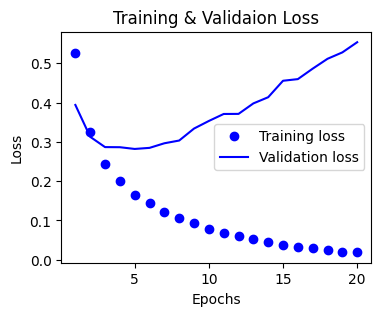

In [ ]:
plt.figure(figsize=(4,3))
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training & Validaion Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
train_acc = history_dict.get('accuracy')
val_acc = history_dict.get('val_accuracy')

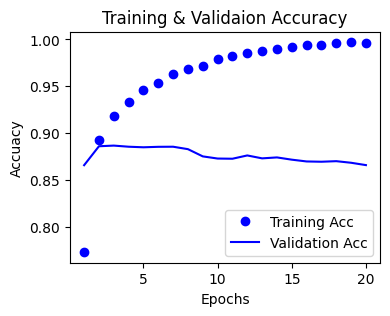

In [ ]:
plt.figure(figsize=(4,3))
plt.plot(epochs, train_acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training & Validaion Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuacy')
plt.show()

### Traingin for only 4 epochs

In [ ]:
history = model.fit(partial_x_train,partial_y_train,
                    epochs=4,batch_size=512)

Epoch 1/4
30/30 [==============================] - 1s 32ms/step - loss: 0.0067 - accuracy: 0.9995
Epoch 2/4
30/30 [==============================] - 1s 37ms/step - loss: 0.0107 - accuracy: 0.9977
Epoch 3/4
30/30 [==============================] - 1s 39ms/step - loss: 0.0045 - accuracy: 0.9999
Epoch 4/4
30/30 [==============================] - 1s 36ms/step - loss: 0.0086 - accuracy: 0.9983


In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.006717,0.999533
1,0.010658,0.997733
2,0.004525,0.999867
3,0.008640,0.998333


In [ ]:
results = model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.7702 - accuracy: 0.8543


In [ ]:
results

[0.7701842784881592, 0.8542799949645996]

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[3.1776589e-03],
       [9.9999994e-01],
       [9.3272507e-01],
       ...,
       [5.5094424e-04],
       [1.1147068e-02],
       [9.9736875e-01]], dtype=float32)